In [1]:
import ollama
import numpy as np

# Simple cosine similarity function
def cosine_similarity_np(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

# Get embedding from Ollama
def get_embedding(text, model="mxbai-embed-large"):
    response = ollama.embeddings(model=model, prompt=text)
    return np.array(response["embedding"])

# Base words
word_a = "king"
word_b = "queen"

v_a = get_embedding(word_a)
v_b = get_embedding(word_b)
v_diff = v_b - v_a

# Candidate words
candidate_words = ["king", "queen", "girl", "boy", "doctor", "nurse", "lawyer", "teacher", "child", "soldier"]
candidate_vectors = [get_embedding(word) for word in candidate_words]

# Cosine similarity
sims = [cosine_similarity_np(v_diff, vec) for vec in candidate_vectors]
sorted_results = sorted(zip(candidate_words, sims), key=lambda x: -x[1])

# Output
print("Top matches to the vector difference:")
for word, sim in sorted_results:
    print(f"{word:10s} similarity: {sim:.4f}")


Top matches to the vector difference:
queen      similarity: 0.4141
nurse      similarity: 0.1566
girl       similarity: 0.0867
doctor     similarity: -0.0330
teacher    similarity: -0.0375
soldier    similarity: -0.0558
child      similarity: -0.0678
lawyer     similarity: -0.0705
boy        similarity: -0.1385
king       similarity: -0.3683


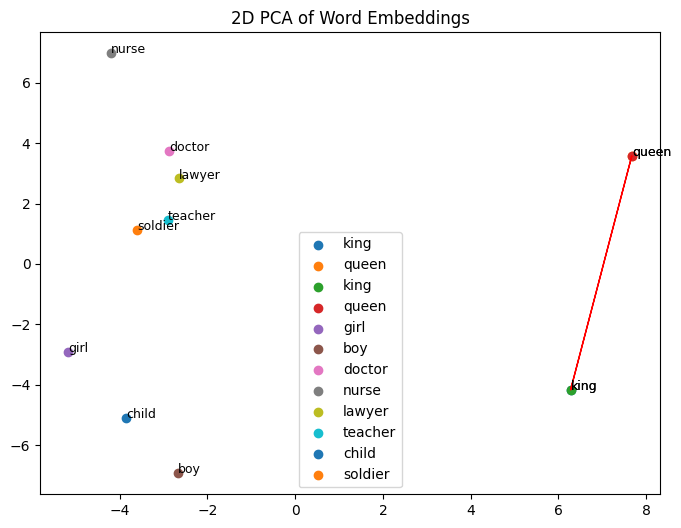

In [2]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Stack all vectors
all_vectors = np.vstack([v_a, v_b] + candidate_vectors)
all_labels = [word_a, word_b] + candidate_words

# Project to 2D
pca = PCA(n_components=2)
proj = pca.fit_transform(all_vectors)

# Plot
plt.figure(figsize=(8, 6))
for i, label in enumerate(all_labels):
    plt.scatter(*proj[i], label=label)
    plt.text(*proj[i], label, fontsize=9)

# Optional: Draw the difference vector
plt.arrow(*proj[0], *(proj[1] - proj[0]), color='red', head_width=0.02, length_includes_head=True)
plt.title("2D PCA of Word Embeddings")
plt.legend()
plt.show()

In [3]:
def find_analogy(word1, word2, word3, candidate_words):
    """
    Solve the analogy: word1 - word2 + word3 ≈ ?,
    excluding word1, word2, and word3 from candidate set.
    """
    # Get embeddings
    v1 = get_embedding(word1)
    v2 = get_embedding(word2)
    v3 = get_embedding(word3)

    # Compute target vector
    target_vec = v1 - v2 + v3

    # Filter candidates
    excluded = {word1, word2, word3}
    filtered_candidates = [w for w in candidate_words if w not in excluded]

    # Get embeddings
    candidate_vecs = [get_embedding(w) for w in filtered_candidates]

    # Compute similarities
    sims = cosine_similarity([target_vec], candidate_vecs)[0]
    sorted_results = sorted(zip(filtered_candidates, sims), key=lambda x: -x[1])

    return sorted_results


In [15]:
# Analogy: king - man + woman ≈ ?
results = find_analogy("king", "man", "woman", candidate_words)

print("Top matches for the analogy:")
for word, sim in results[:5]:
    print(f"{word:10s} similarity: {sim:.4f}")



Top matches for the analogy:
queen      similarity: 0.6788
girl       similarity: 0.5525
child      similarity: 0.5329
nurse      similarity: 0.5321
teacher    similarity: 0.4839


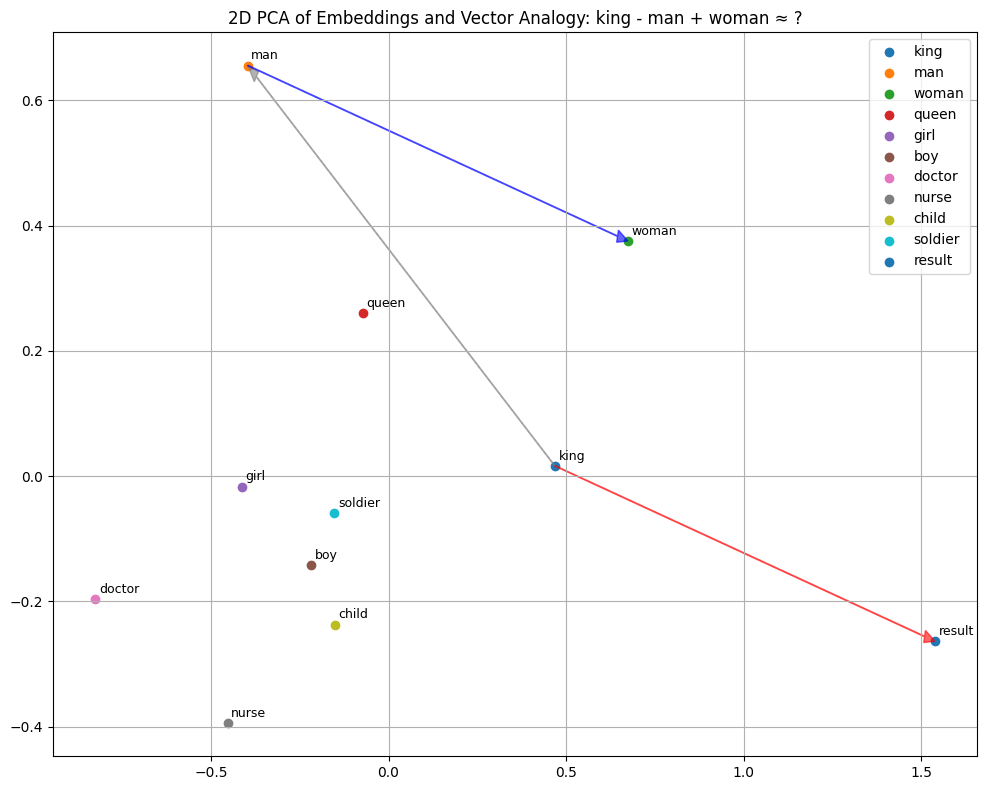

In [18]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Simulated embeddings for the example
# We'll mock embeddings for: king, man, woman, and a few candidates
np.random.seed(42)

# Assume 5D embeddings for this toy example
embedding_dim = 5

# Define some example embeddings
embeddings = {
    "king": np.random.rand(embedding_dim),
    "man": np.random.rand(embedding_dim),
    "woman": np.random.rand(embedding_dim),
    "queen": np.random.rand(embedding_dim),
    "girl": np.random.rand(embedding_dim),
    "boy": np.random.rand(embedding_dim),
    "doctor": np.random.rand(embedding_dim),
    "nurse": np.random.rand(embedding_dim),
    "child": np.random.rand(embedding_dim),
    "soldier": np.random.rand(embedding_dim)
}

# Analogy vector: king - man + woman
v_analogy = embeddings["king"] - embeddings["man"] + embeddings["woman"]

# Add the computed vector as "result" for visualization
embeddings["result"] = v_analogy

# Prepare for PCA
words = list(embeddings.keys())
vectors = np.vstack([embeddings[word] for word in words])

# Project into 2D
pca = PCA(n_components=2)
proj = pca.fit_transform(vectors)

# Plotting
plt.figure(figsize=(10, 8))
for i, word in enumerate(words):
    x, y = proj[i]
    plt.scatter(x, y, label=word)
    plt.text(x + 0.01, y + 0.01, word, fontsize=9)

# Draw vector arrows: king -> man, woman, and result
def draw_arrow(word_from, word_to, color):
    idx_from = words.index(word_from)
    idx_to = words.index(word_to)
    plt.arrow(proj[idx_from][0], proj[idx_from][1],
              proj[idx_to][0] - proj[idx_from][0],
              proj[idx_to][1] - proj[idx_from][1],
              color=color, head_width=0.02, length_includes_head=True, alpha=0.6)

draw_arrow("king", "man", "gray")
draw_arrow("man", "woman", "blue")
draw_arrow("king", "result", "red")

plt.title("2D PCA of Embeddings and Vector Analogy: king - man + woman ≈ ?")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


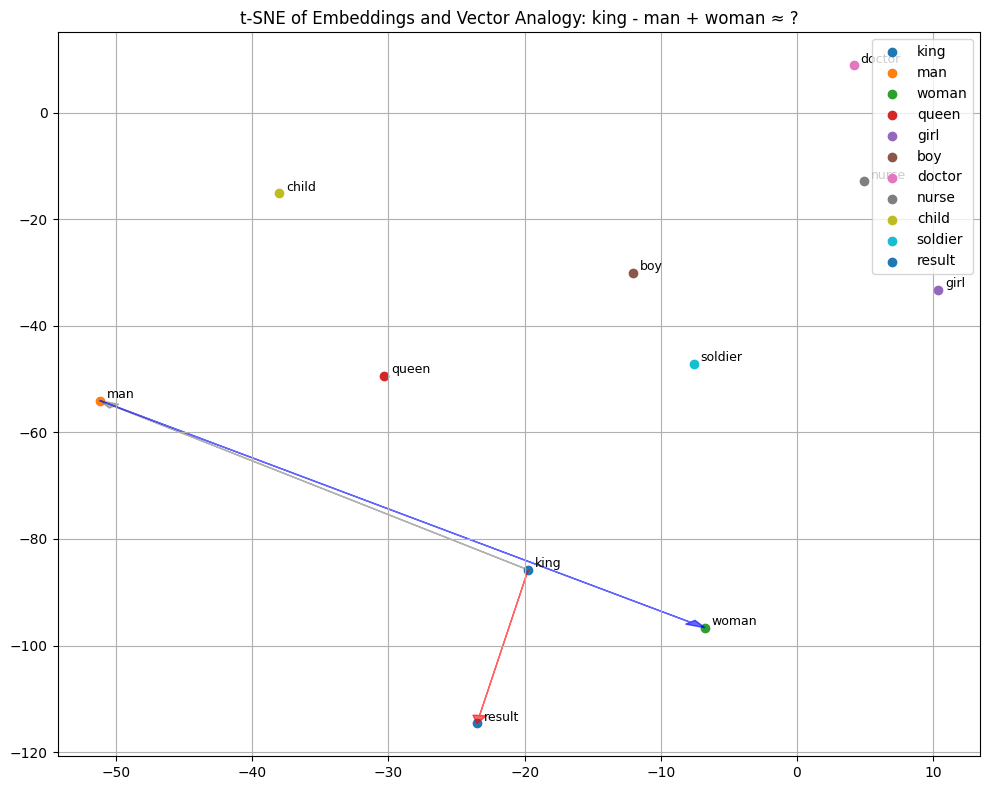

In [20]:
from sklearn.manifold import TSNE

# Compute 2D t-SNE projection
tsne = TSNE(n_components=2, random_state=42, perplexity=5, n_iter=1000)
tsne_proj = tsne.fit_transform(vectors)

# Plotting
plt.figure(figsize=(10, 8))
for i, word in enumerate(words):
    x, y = tsne_proj[i]
    plt.scatter(x, y, label=word)
    plt.text(x + 0.5, y + 0.5, word, fontsize=9)

# Re-draw arrows using t-SNE coordinates
def draw_tsne_arrow(word_from, word_to, color):
    idx_from = words.index(word_from)
    idx_to = words.index(word_to)
    plt.arrow(tsne_proj[idx_from][0], tsne_proj[idx_from][1],
              tsne_proj[idx_to][0] - tsne_proj[idx_from][0],
              tsne_proj[idx_to][1] - tsne_proj[idx_from][1],
              color=color, head_width=1.0, length_includes_head=True, alpha=0.6)

draw_tsne_arrow("king", "man", "gray")
draw_tsne_arrow("man", "woman", "blue")
draw_tsne_arrow("king", "result", "red")

plt.title("t-SNE of Embeddings and Vector Analogy: king - man + woman ≈ ?")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()